# ANALISIS E INSIGHTS

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../../02_Datos/01_Originales/airbnb2025.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,index,id,name,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,license,instant_bookable,neighbourhood_group,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,pisos_rentables
0,0,21853,Bright and airy room,no response,f,"['email', 'phone']",t,t,Cármenes,Private room in rental unit,Private room,"[""First aid kit"", ""Wifi"", ""Kitchen"", ""Essentia...",yes,no,f,Latina,83531,2010-02-21,0.0,0.0,2.0,2.0,40.40381,-3.74130,1,1.0,1.0,1.0,31,4,40,0,0,0,144,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,2,0,2,0,0.27,2772,31.00,60,01_Una,0-3,1,5-71,50,110880.0,3.521406,1
1,1,30320,Great Vacational Apartments,no response,f,"['email', 'phone']",t,f,Sol,Entire rental unit,Entire home/apt,"[""Heating"", ""Wifi"", ""TV with standard cable"", ...",no,no,f,Centro,130907,2010-05-24,0.0,93.0,3.0,6.0,40.41476,-3.70418,2,1.0,1.0,1.0,149,5,180,0,0,0,0,172,0,0,2010-07-06,2022-09-26,4.63,4.71,4.88,4.82,4.78,4.90,4.69,3,3,0,0,0.98,6170,149.00,100,01_Una,0-3,1,71-1136,50,246800.0,0.230175,1
2,2,30959,Beautiful loft in Madrid Center,no response,f,"['email', 'phone']",t,f,Embajadores,Entire loft,Entire home/apt,"[""Breakfast"", ""Heating"", ""Wifi"", ""Smoking allo...",no,no,f,Centro,132883,2010-05-26,0.0,88.0,1.0,4.0,40.41259,-3.70105,2,1.0,1.0,1.0,92,3,730,0,0,0,0,8,0,0,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,1,1,0,0,0.07,6170,92.00,100,01_Una,0-3,1,1-4,50,246800.0,0.499379,1
3,3,40916,Holiday Apartment Madrid Center,no response,f,"['email', 'phone']",t,f,Universidad,Entire rental unit,Entire home/apt,"[""Heating"", ""Wifi"", ""Pets allowed"", ""Kitchen"",...",no,no,f,Centro,130907,2010-05-24,0.0,89.0,3.0,6.0,40.42247,-3.70577,3,1.0,1.0,2.0,124,5,180,0,0,0,0,49,0,0,2010-11-01,2021-12-11,4.65,4.69,4.90,4.85,4.79,4.88,4.55,3,3,0,0,0.29,6170,124.00,100,01_Una,0-3,3,5-71,50,246800.0,0.671046,1
4,4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,within an hour,f,"['email', 'phone']",t,t,Justicia,Private room in rental unit,Private room,"[""Books and reading material"", ""First aid kit""...",yes,no,f,Centro,303845,2010-11-29,100.0,100.0,3.0,3.0,40.41884,-3.69655,4,1.5,1.0,2.0,69,1,30,13,37,59,332,219,44,3,2018-05-10,2024-11-24,4.64,4.78,4.42,4.79,4.85,4.97,4.58,3,1,2,0,2.73,6170,137.62,9,01_Una,4,3,71-1136,50,246800.0,0.621024,0


## ANALISIS

### Analisis sobre el precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [3]:
df.precio_total.describe()

count    25913.000000
mean       137.748630
std        388.139306
min         20.000000
25%         68.000000
50%        100.000000
75%        142.000000
max      21347.000000
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [4]:
df.precio_total.median()

100.0

In [5]:
df.groupby('neighbourhood_group').precio_total.median().sort_values(ascending = False)

neighbourhood_group
Salamanca             120.00
Centro                111.00
Chamartín             109.00
Chamberí              104.00
Moncloa               101.00
Retiro                 99.00
Tetuán                 92.00
San Blas               89.81
Hortaleza              86.00
Arganzuela             85.00
Fuencarral             82.50
Barajas                79.00
Ciudad Lineal          78.00
Latina                 70.00
Puente de Vallecas     66.00
Carabanchel            65.00
Villaverde             60.50
Villa de Vallecas      60.00
Usera                  59.00
Vicálvaro              51.00
Moratalaz              47.50
Name: precio_total, dtype: float64

Nos llama la atención el dato de San Blas, vamos a verlo con más detalle a ver qué está pasando.

In [6]:
df.loc[df.neighbourhood_group == 'San Blas'].sort_values('precio_total',ascending = False).head(10)

,index,id,name,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,license,instant_bookable,neighbourhood_group,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,pisos_rentables
3307,3307,20842089,Mas cerca del Wanda Metropolitano imposible,no response,f,"['email', 'phone']",t,f,Rosas,Private room in home,Private room,"[""BBQ grill"", ""Dishwasher"", ""Pool"", ""Gym"", ""Br...",yes,no,t,San Blas,11086450,2014-01-07,0.0,75.0,1.0,1.0,40.430030,-3.599750,3,1.0,2.0,3.0,700,2,30,30,60,90,365,0,0,0,2014-01-07,2014-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0.00,2996,2099.62,0,02_Dos,0-3,3,1-4,70,167776.0,8.895150,0
6365,6365,35155733,Cosy apartment near Metropolitano Stadium,no response,f,"['email', 'phone']",t,t,Hellín,Private room in rental unit,Private room,"[""Private living room"", ""Hangers"", ""Heating"", ...",yes,no,t,San Blas,78241549,2016-06-17,0.0,86.0,1.0,1.0,40.431270,-3.612340,5,1.5,2.0,2.0,1050,1,3,30,60,90,365,0,0,0,2016-06-17,2016-06-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0.00,2996,2099.62,0,02_Dos,4-16,3,1-4,70,167776.0,7.873067,0
12046,12046,700011597005161293,Habitación reformada,no response,f,"['email', 'phone']",t,t,Arcos,Private room in bed and breakfast,Private room,"[""Wifi"", ""Kitchen"", ""TV"", ""Washer""]",yes,no,f,San Blas,144457564,2017-08-05,0.0,80.0,1.0,1.0,40.423490,-3.620860,3,1.0,1.0,2.0,1000,2,3,29,59,89,89,1,0,0,2022-09-28,2022-09-28,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,0,1,0,0.04,2996,1999.62,75,01_Una,0-3,3,1-4,50,119840.0,7.024499,1
5774,5774,34569100,Final Champions close of Wanda Stadium.Two Rooms,no response,f,"['email', 'phone']",t,t,Rosas,Private room in home,Private room,"[""Hangers"", ""Breakfast"", ""Heating"", ""Wifi"", ""H...",yes,no,t,San Blas,231479865,2018-12-19,0.0,75.0,1.0,3.0,40.429030,-3.607640,3,2.0,2.0,2.0,950,1,3,30,60,90,365,1,0,0,2019-06-02,2019-06-02,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,0,1,0,0.01,2996,1899.62,0,02_Dos,0-3,3,1-4,70,167776.0,8.217940,0
6171,6171,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,no response,f,"['email', 'phone']",t,f,Arcos,Private room in home,Private room,"[""Exterior security cameras on property"", ""Bre...",no,no,f,San Blas,263474389,2019-05-22,0.0,80.0,1.0,2.0,40.419200,-3.612290,10,4.0,5.0,4.0,469,1,3,0,0,0,0,0,0,0,2019-05-22,2019-05-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0.00,2996,1875.62,100,04_Cuatro o mas,4-16,3-19,1-4,150,359520.0,7.714952,1
6313,6313,35137335,Bedrooms Champion League Final,a few days or more,f,"['email', 'phone']",t,t,Arcos,Private room in home,Private room,"[""Hangers"", ""First aid kit"", ""Heating"", ""Wifi""...",yes,no,t,San Blas,124425621,2017-04-05,0.0,80.0,2.0,3.0,40.426580,-3.611960,3,2.0,2.0,3.0,500,1,3,30,60,90,365,0,0,0,2017-04-05,2017-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0.00,2996,1499.62,0,02_Dos,0-3,3,1-4,70,167776.0,7.814783,0
6036,6036,34796669,Bedrooms close to Wanda Metropolitano,no response,f,"['email', 'phone']",t,f,Rosas,Private room in home,Private room,"[""Hangers"", ""Exterior security cameras on prop...",yes,no,t,San Blas,49642755,2015-11-22,0.0,75.0,2.0,2.0,40.425620,-3.604900,3,1.5,2.0,2.0,700,1,4,28,58,88,88,0,0

Vemos que hay precios superiores a 2000 euros que por la zona entendemos que son datos atípicos de alquileres pero, por conocimiento del negocio y de la ciudad, sabemos que el estadio del Atlético de Madrid está allí y esas noches tan caras es muy probable que sean las noches de los partidos importantes como los de la Champions League. Lo cual es un insight interesante: 

**Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos**

¿Tendría sentido generar un producto de alquiler que consista en alquilar de forma "normal" a un precio inferior al mercado con la condición de que el inquilino deje el piso libre para alquilarlo "turísticamente" en fechas señaladas?

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín a la cabeza.

Pero por ejemplo vemos que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [7]:
temp = df.groupby('neighbourhood_group')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood_group,,
Arganzuela,85.00,194000.0
Barajas,79.00,147440.0
Carabanchel,65.00,108480.0
Centro,111.00,246800.0
Chamartín,109.00,251400.0
Chamberí,104.00,266600.0
Ciudad Lineal,78.00,147040.0
Fuencarral,82.50,161520.0
Hortaleza,86.00,174720.0


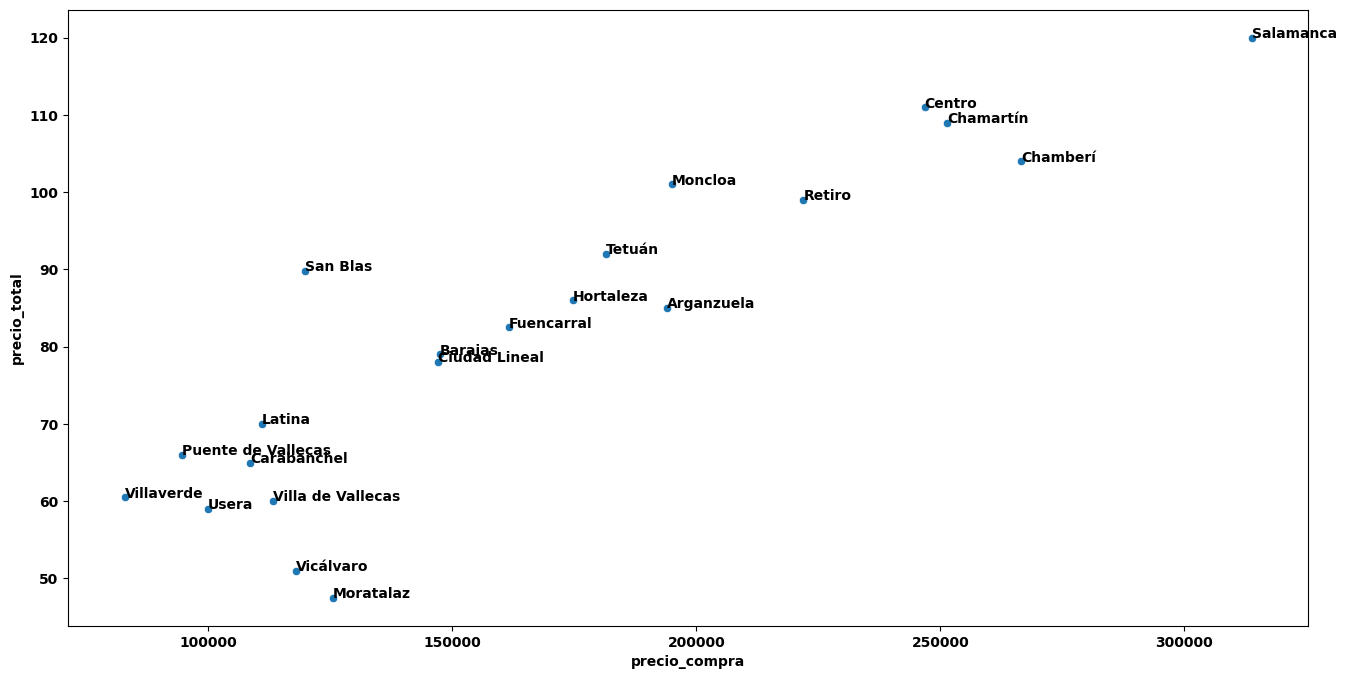

In [8]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar. Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto, y la excepción de San Blas que ya sabemos por qué es.

Por tanto, como era esperable no hay a priori ningún "chollo" claro a este nivel, así que vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [9]:
temp = df.groupby('neighbourhood_cleansed')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood_cleansed,,
Abrantes,57.00,108480.0
Acacias,77.62,194000.0
Adelfas,90.00,221960.0
Aeropuerto,56.50,147440.0
Aguilas,50.00,110880.0
...,...,...
Valverde,81.00,161520.0
Ventas,64.00,147040.0
Vinateros,32.50,125440.0


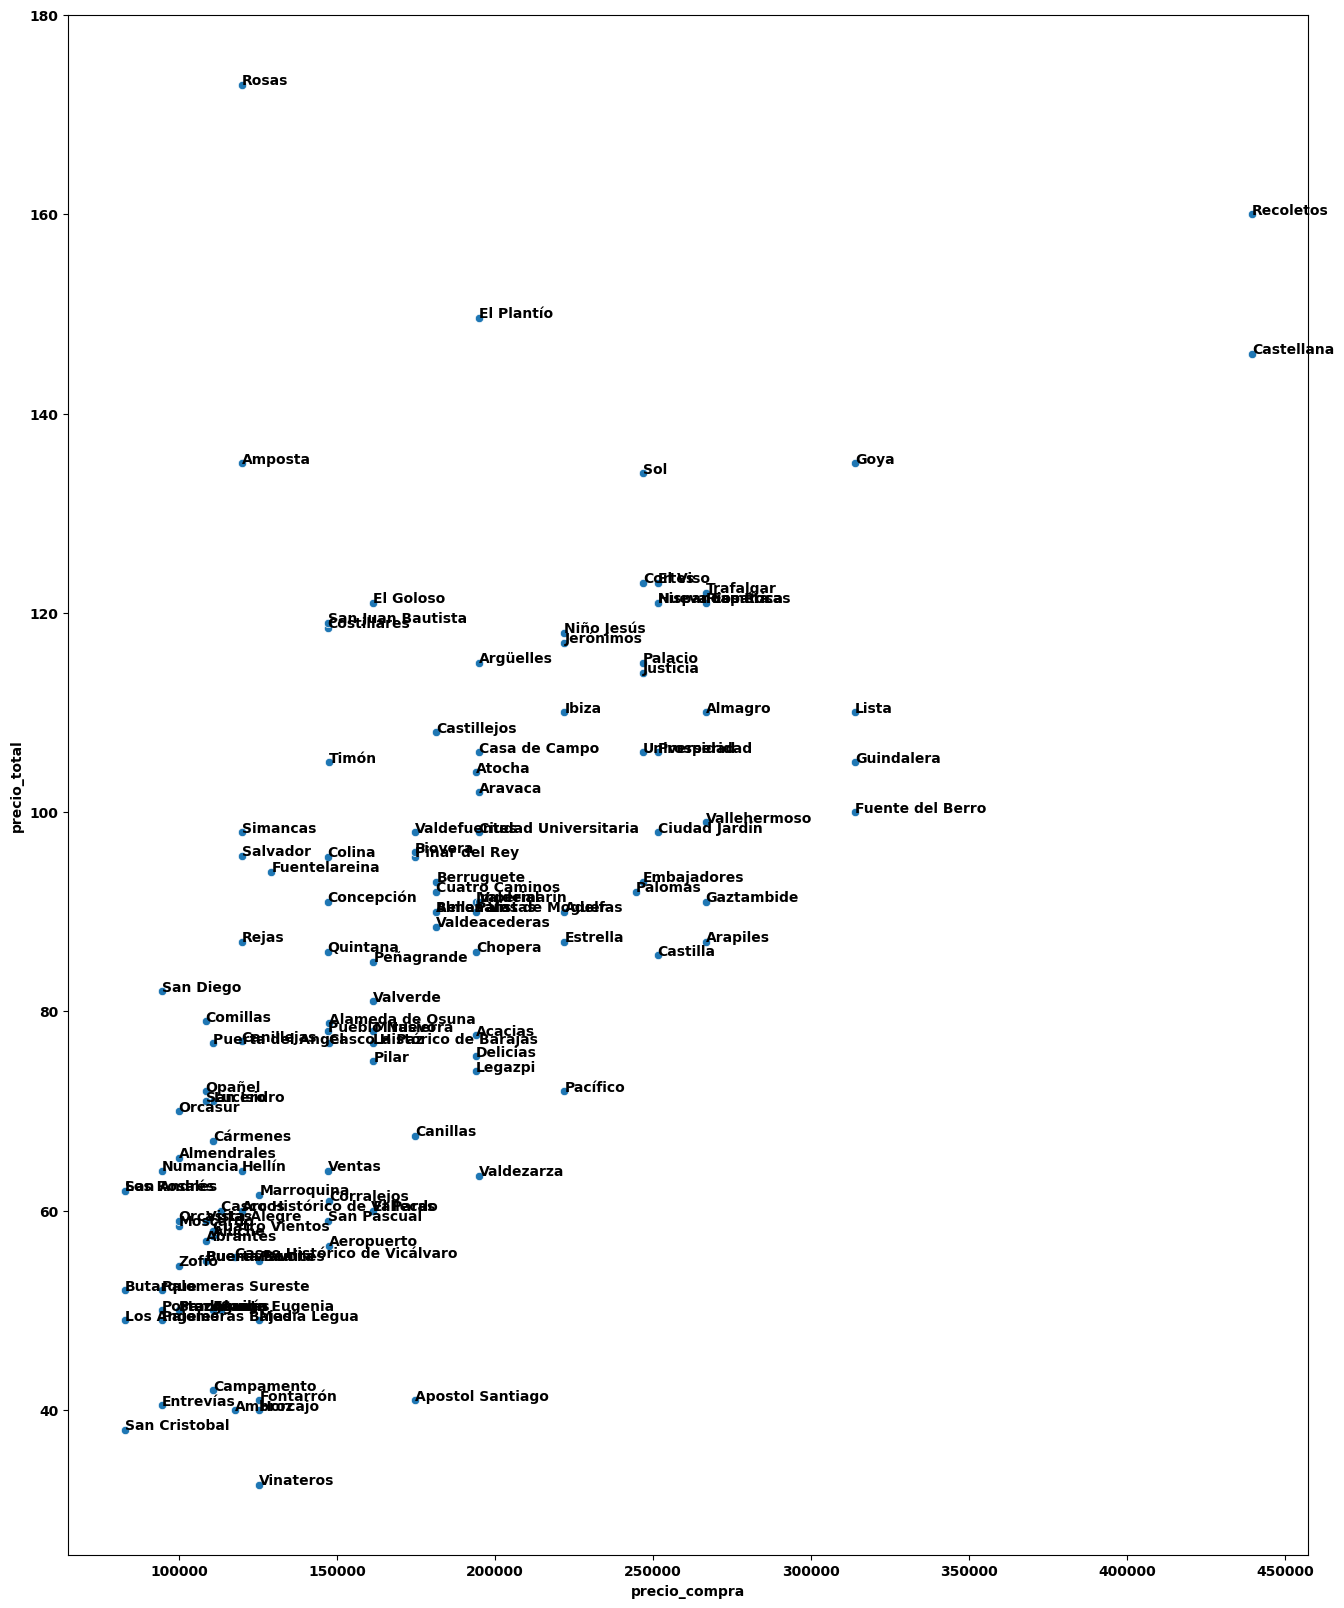

In [10]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada])

A este nivel ya vemos más cosas:

* 1 barrio que sobresale de San Blas
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo <150K: Amposta
    * Medio 150K-250K: Arguelles y Cortés
    * Medio-alto 250K-350K: Almagro
    * Alto >350K: Castellana
    
**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación ingresos-coste y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

In [11]:
df.loc[df.neighbourhood_cleansed.isin(['Amposta']),'neighbourhood_group'].unique()

array(['San Blas'], dtype=object)

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25913 entries, 0 to 25912
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   index                                         25913 non-null  int64         
 1   id                                            25913 non-null  int64         
 2   name                                          25913 non-null  object        
 3   host_response_time                            25913 non-null  object        
 4   host_is_superhost                             25913 non-null  object        
 5   host_verifications                            25913 non-null  object        
 6   host_has_profile_pic                          25913 non-null  object        
 7   host_identity_verified                        25913 non-null  object        
 8   neighbourhood_cleansed                        25913 non-null  obje

In [13]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,01_Una,0-3,1,5-71,31.00,110880.0
1,01_Una,0-3,1,71-1136,149.00,246800.0
2,01_Una,0-3,1,1-4,92.00,246800.0
3,01_Una,0-3,3,5-71,124.00,246800.0
4,01_Una,4,3,71-1136,137.62,246800.0
...,...,...,...,...,...,...
25908,01_Una,0-3,1,1-4,85.00,147040.0
25909,01_Una,4,3,1-4,258.00,110880.0
25910,01_Una,0-3,1,1-4,20.00,246800.0
25911,01_Una,0-3,3,1-4,258.00,110880.0


In [14]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,31.00,110880.0,bedrooms_disc,01_Una
1,149.00,246800.0,bedrooms_disc,01_Una
2,92.00,246800.0,bedrooms_disc,01_Una
3,124.00,246800.0,bedrooms_disc,01_Una
4,137.62,246800.0,bedrooms_disc,01_Una
...,...,...,...,...
103647,85.00,147040.0,number_of_reviews_disc,1-4
103648,258.00,110880.0,number_of_reviews_disc,1-4
103649,20.00,246800.0,number_of_reviews_disc,1-4
103650,258.00,110880.0,number_of_reviews_disc,1-4


In [15]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
accommodates_disc      0-3                      80.0       201120.0
                       4                       121.0       246800.0
                       4-16                    175.0       345520.0
bedrooms_disc          00_Estudio               82.0       197440.0
                       01_Una                   86.0       246800.0
                       02_Dos                  137.0       345520.0
                       03_Tres                 180.0       444240.0
                       04_Cuatro o mas         250.0       592320.0
beds_disc              1                        74.0       197440.0
                       3                       123.0       246800.0
                       3-19                    190.0       359520.0
number_of_reviews_disc 1-4                      99.0       246800.0
                       5-71                    100.0       246800.0
                       71-1136                 100.0       246800.0

Sobre el minicubo vamos analizando cada variable.

In [16]:
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra
value,,
00_Estudio,82.0,197440.0
01_Una,86.0,246800.0
02_Dos,137.0,345520.0
03_Tres,180.0,444240.0
04_Cuatro o mas,250.0,592320.0


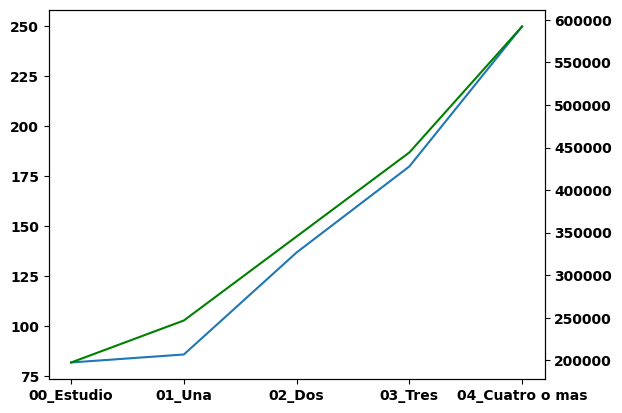

In [17]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

En cuanto al número de habitaciones entre cero y una habitación, el precio_compra casi no varia pero si aumenta el precio_total por lo que sería mas rentable

Parte de este efecto puede ser artificial, ya que usamos el número de habitaciones para calcular el precio total como el precio de compra.

In [18]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1,74.0,197440.0
3,123.0,246800.0
3-19,190.0,359520.0


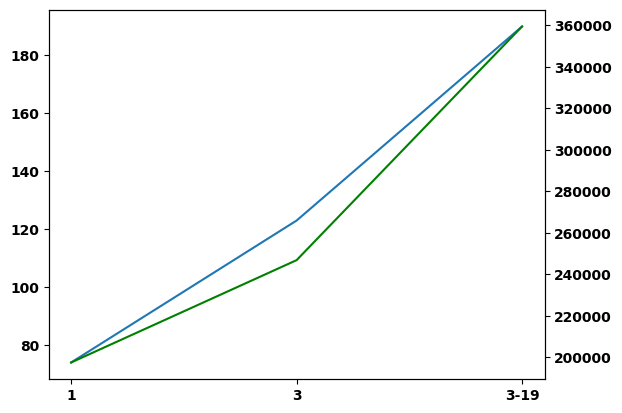

In [19]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

En cuanto al número de camas sí hay una conclusión:

**Insight 3: el número de camas a evitar es 2**. O bien ponemos una cama o intentamos meter todas las posibles.

Dado que no había este efecto en el número de habitaciones podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso

Veámoslo por ejemplo con los pisos de una habitación:

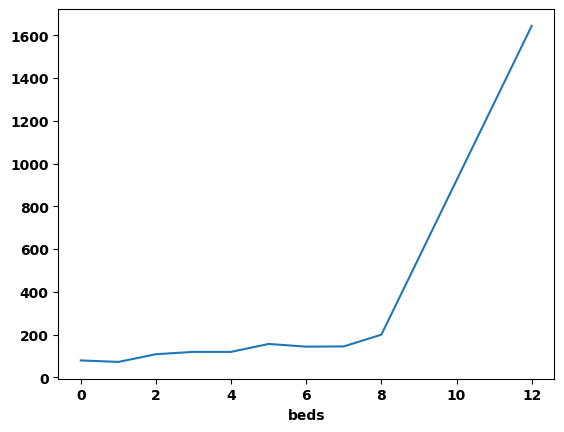

In [20]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

Efectivamente aquí hay algo, ya que figura que para pisos de una habitación hay gente que está metiendo hasta doce de camas

Sería un tema a explorar con más detalle y comentar con alguien que conozca el negocio por si hubiera algo que aportar, pero la conclusión es que hay propietarios que buscan maximizar el beneficio metiendo muchas camas por habitación

Vamos a ver unos ejemplos:

In [21]:
df.loc[(df.bedrooms == 1) & (df.beds > 6)]

,index,id,name,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,license,instant_bookable,neighbourhood_group,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,pisos_rentables
2121,2121,15428073,HELLENHOST: Cozy Loft in Gran Vía - Madrid,within an hour,f,"['phone', 'work_email']",t,t,Universidad,Entire rental unit,Entire home/apt,"[""City skyline view"", ""First aid kit"", ""Wifi"",...",yes,yes,t,Centro,32420211,2015-05-02,100.0,100.0,4.0,5.0,40.421257,-3.706301,6,1.0,1.0,7.0,226,1,1125,20,45,68,259,100,2,0,2016-11-19,2024-05-26,4.76,4.87,4.92,4.81,4.88,4.97,4.74,4,4,0,0,1.02,6170,226.00,29,01_Una,4-16,3-19,71-1136,50,246800.0,0.562764,1
10342,10342,544815531002663097,PUERTA DEL SOL PERFECTO PARA GRUPO,within an hour,f,"['email', 'phone']",f,t,Cortes,Entire rental unit,Entire home/apt,"[""Bidet"", ""Wifi"", ""Clothing storage: closet"", ...",yes,no,t,Centro,441464755,2022-01-21,93.0,100.0,1.0,1.0,40.415480,-3.700610,8,1.0,1.0,8.0,145,2,1125,9,20,37,111,123,36,1,2022-02-06,2024-11-24,4.60,4.66,4.59,4.76,4.69,4.80,4.59,1,1,0,0,3.54,6170,145.00,69,01_Una,4-16,3-19,71-1136,50,246800.0,0.269550,1
13124,13124,784862856028711383,Paseo de la Castellana. 10’ del Santiago Bernabeu,within an hour,t,"['email', 'phone']",t,t,Berruguete,Entire rental unit,Entire home/apt,"[""Wifi"", ""Clothing storage: closet"", ""AC - spl...",yes,no,t,Tetuán,402837283,2021-05-22,100.0,100.0,11.0,13.0,40.460340,-3.700470,6,1.0,1.0,7.0,63,1,120,13,36,36,36,72,37,3,2023-02-19,2024-12-08,4.85,4.86,4.79,4.96,4.96,4.93,4.79,6,6,0,0,3.26,4536,63.00,90,01_Una,4-16,3-19,71-1136,50,181440.0,4.856901,1
16309,16309,951931255884882441,Cama en habitación compartida 6 camas,within an hour,f,"['email', 'phone']",t,t,Embajadores,Shared room in rental unit,Shared room,"[""Smoke alarm"", ""First aid kit"", ""Wifi"", ""Self...",yes,no,f,Centro,529015349,2023-07-31,100.0,99.0,15.0,23.0,40.411811,-3.704862,1,3.0,1.0,8.0,24,1,365,13,43,43,289,78,63,2,2023-08-09,2024-11-16,4.53,4.72,4.61,4.69,4.79,4.72,4.67,15,0,4,11,4.76,6170,191.44,20,01_Una,0-3,3-19,71-1136,50,246800.0,0.561938,1
17097,17097,996129561563914923,Cama en habitación compartida 6 camas,within an hour,f,"['email', 'phone']",t,t,Embajadores,Shared room in rental unit,Shared room,"[""First aid kit"", ""Wifi"", ""Kitchen"", ""Essentia...",yes,no,f,Centro,529015349,2023-07-31,100.0,99.0,15.0,23.0,40.411076,-3.705688,1,3.0,1.0,8.0,24,1,365,8,8,20,282,72,62,4,2023-10-11,2024-12-01,4.69,4.81,4.68,4.83,4.83,4.86,4.76,15,0,4,11,5.03,6170,191.44,22,01_Una,0-3,3-19,71-1136,50,246800.0,0.659407,1
17185,17185,998269085402388662,2 Camas en habitación compartida 6 camas,within an hour,f,"['email', 'phone']",t,t,Embajadores,Shared room in rental unit,Shared room,"[""First aid kit"", ""Wifi"", ""Kitchen"", ""Essentia...",yes,no,f,Centro,529015349,2023-07-31,100.0,99.0,15.0,23.0,40.411811,-3.704862,2,3.0,1.0,8.0,49,1,365,12,36,66,341,46,41,5,2023-10-29,2024-12-01,4.54,4.85,4.52,4.87,4.85,4.80,4.67,15,0,4,11,3.36,6170,391.44,6,01_Una,0-3,3-19,5-71,50,246800.0,0.561938,0
17392,17392,1011554774276353687,"5 Camas en hab. compartida-baño privado, 6 lit...",within 

Vamos a analizar ahora por el número de huéspedes que aceptan

In [22]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-3,80.0,201120.0
4,121.0,246800.0
4-16,175.0,345520.0


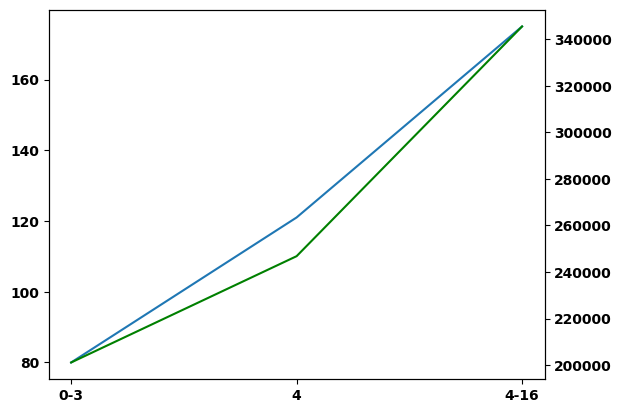

In [23]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 4: el número óptimo de huéspedes está en 4, ya el precio de los inmuebles no varia demasiado hasta esos ocupantes pero, a partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Por último vamos a analizar la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En este caso como hemos construído la distancia a la Puerta del Sol vamos a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos pero se podrían construir tantas variables con los puntos de interés como fuera necesario repitiendo el análisis para cada una

Para ello primero vamos a calcular la distancia media por distrito y elegir un punto de corte.

In [24]:
df.groupby('neighbourhood_group').pdi_sol.median().sort_values()

neighbourhood_group
Centro                 0.739457
Arganzuela             1.819477
Chamberí               2.070151
Moncloa                2.094686
Retiro                 2.438053
Salamanca              2.827520
Latina                 3.337816
Carabanchel            3.717970
Usera                  3.866540
Puente de Vallecas     4.287319
Chamartín              4.476647
Tetuán                 4.639502
Moratalaz              5.009633
Ciudad Lineal          5.130979
Fuencarral             7.528311
Villaverde             7.588138
San Blas               8.108111
Hortaleza              8.119706
Vicálvaro              8.502931
Villa de Vallecas      8.754420
Barajas               11.592324
Name: pdi_sol, dtype: float64

Vamos a cortar en Latina incluído.

Y sobre esa selección vamos a visualizar con un scatter.

In [25]:
df.groupby('neighbourhood_group').pdi_sol.median().sort_values()[0:7].index.to_list()

['Centro',
 'Arganzuela',
 'Chamberí',
 'Moncloa',
 'Retiro',
 'Salamanca',
 'Latina']

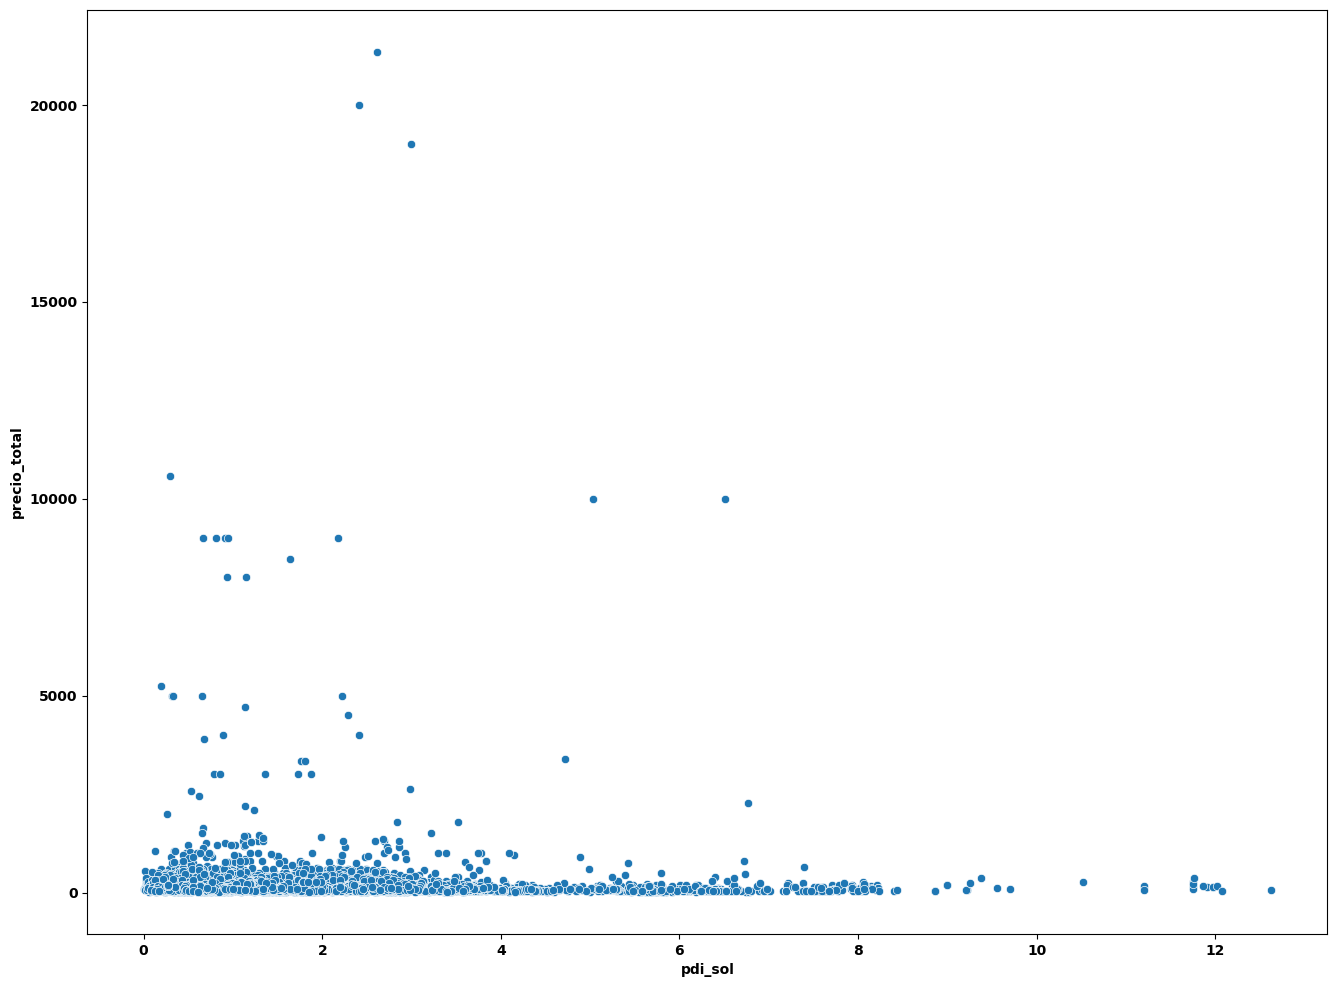

In [26]:
seleccion = df.groupby('neighbourhood_group').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.neighbourhood_group.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablemente tengan un precio de compra menor**

### Analisis sobre la ocupación

Para este punto podríamos repetir exactamente los mismos análisis que con el precio pero cambiando la variable precio por la de ocupación que habíamos construido.

Dado que sería igual no vamos a desarrollarlo y te lo dejo como tarea para que practiques e intentes obtener tus primeros insights.

En su lugar prefiero el tiempo para enseñarte cómo podemos incluir análisis sobre un mapa, dado que en este caso sería algo muy relevante y es un tipo de análisis que siempre gusta mucho.

**¿Cual es el ocupación medio? ¿y el rango de ocupación?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por ocupación media?**

In [27]:
df.ocupacion.describe()

count    25913.000000
mean        54.749547
std         36.926612
min          0.000000
25%         17.000000
50%         56.000000
75%         94.000000
max        100.000000
Name: ocupacion, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [28]:
df.ocupacion.median()

56.0

In [29]:
df.groupby('neighbourhood_group').ocupacion.median().sort_values(ascending = False)

neighbourhood_group
Moratalaz             75.5
Barajas               75.0
San Blas              75.0
Villaverde            72.5
Retiro                66.0
Moncloa               65.0
Latina                63.0
Fuencarral            62.0
Arganzuela            61.0
Hortaleza             57.5
Centro                57.0
Salamanca             56.0
Ciudad Lineal         55.0
Chamberí              55.0
Carabanchel           54.5
Puente de Vallecas    52.0
Usera                 51.0
Vicálvaro             50.0
Chamartín             41.0
Tetuán                41.0
Villa de Vallecas     34.0
Name: ocupacion, dtype: float64

Nos llama la atención el dato de San Blas, vamos a verlo con más detalle a ver qué está pasando.

In [30]:
df.loc[df.neighbourhood_group == 'San Blas'].sort_values('ocupacion',ascending = False).head(10)

,index,id,name,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,has_availability,license,instant_bookable,neighbourhood_group,host_id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,precio_m2,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,pisos_rentables
6309,6309,35132510,Se alquila habitacion para la final de la Cham...,no response,f,"['email', 'phone']",t,f,Hellín,Private room in rental unit,Private room,"[""Hot water"", ""Wifi"", ""Essentials""]",no,no,f,San Blas,123251555,2017-03-29,0.0,86.0,1.0,1.0,40.429390,-3.615350,3,1.0,0.0,2.0,91,1,1125,0,0,0,0,0,0,0,2017-03-29,2017-03-29,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0,1,0,0.00,2996,181.62,100,00_Estudio,0-3,3,1-4,40,95872.0,7.582310,1
6025,6025,34680215,Wanda metropolitano Room,no response,f,"['email', 'phone']",t,f,Rosas,Private room in home,Private room,"[""Breakfast"", ""Heating"", ""Wifi"", ""Hair dryer"",...",no,no,f,San Blas,261609960,2019-05-13,0.0,75.0,1.0,1.0,40.427590,-3.603900,2,1.0,0.0,1.0,173,1,2,0,0,0,0,0,0,0,2019-05-13,2019-05-13,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0,1,0,0.00,2996,173.00,100,00_Estudio,0-3,1,1-4,40,95872.0,8.506231,1
6215,6215,34914686,Alquiler de habitacion a 20 del Wanda,no response,f,['phone'],t,f,Amposta,Private room in rental unit,Private room,"[""Free parking on premises"", ""Hangers"", ""First...",no,no,f,San Blas,263139662,2019-05-21,0.0,74.0,1.0,1.0,40.423830,-3.624980,2,1.0,2.0,1.0,236,1,1125,0,0,0,0,0,0,0,2019-05-21,2019-05-21,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0,1,0,0.00,2996,236.00,100,02_Dos,0-3,1,1-4,70,167776.0,6.682085,1
6224,6224,34997346,"Magnífica habitación, CERCA DEL WANDA",no response,f,"['email', 'phone']",t,f,Simancas,Private room in rental unit,Private room,"[""Hangers"", ""First aid kit"", ""Heating"", ""Wifi""...",no,no,f,San Blas,263666045,2019-05-23,0.0,85.0,1.0,1.0,40.429430,-3.628570,2,1.0,0.0,1.0,114,1,1125,0,0,0,0,0,0,0,2019-05-23,2019-05-23,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0,1,0,0.00,2996,114.00,100,00_Estudio,0-3,1,1-4,40,95872.0,6.486697,1
6226,6226,34999824,Piso final champions league,no response,f,"['email', 'phone']",t,f,Canillejas,Entire home,Entire home/apt,"[""Free parking on premises"", ""Hangers"", ""Smoki...",no,no,f,San Blas,160767488,2017-11-30,0.0,80.0,1.0,1.0,40.440410,-3.610480,6,1.0,4.0,3.0,123,2,2,0,0,0,0,0,0,0,2017-11-30,2017-11-30,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,1,0,0,0.00,2996,123.00,100,04_Cuatro o mas,4-16,3,1-4,120,287616.0,8.291607,1
6232,6232,34920045,Disfruta la final de la Champions League.,no response,f,"['email', 'phone']",t,f,Simancas,Private room in rental unit,Private room,"[""Hangers"", ""Breakfast"", ""Wifi"", ""Hair dryer"",...",no,no,f,San Blas,263162785,2019-05-21,0.0,85.0,2.0,2.0,40.429660,-3.624700,3,1.0,0.0,2.0,85,1,2,0,0,0,0,0,0,0,2019-05-21,2019-05-21,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1,0,1,0,0.00,2996,169.62,100,00_Estudio,0-3,3,1-4,40,95872.0,6.812238,1
6237,6237,34925146,EUFA CHAMPIONS LEAGUE FINAL MAY31-JUNE1,no response,f,"['email', 'phone', 'work_email']",t,f,Simancas,Private room in rental unit,Private room,"[""Private living room"", ""Smoke alarm"", ""Privat...",no,no,f,San Blas,133624002,2017-06-05,0.0,85.0,1.0,1.0,40.437290,-3.618140,2,1.0,0.0,1.0,114,1,1,0,0,0,0,

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín a la cabeza.

Pero por ejemplo vemos que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [31]:
temp = df.groupby('neighbourhood_group')[['ocupacion','precio_compra','precio_total']].median()
temp

,ocupacion,precio_compra,precio_total
neighbourhood_group,,,
Arganzuela,61.0,194000.0,85.00
Barajas,75.0,147440.0,79.00
Carabanchel,54.5,108480.0,65.00
Centro,57.0,246800.0,111.00
Chamartín,41.0,251400.0,109.00
Chamberí,55.0,266600.0,104.00
Ciudad Lineal,55.0,147040.0,78.00
Fuencarral,62.0,161520.0,82.50
Hortaleza,57.5,174720.0,86.00


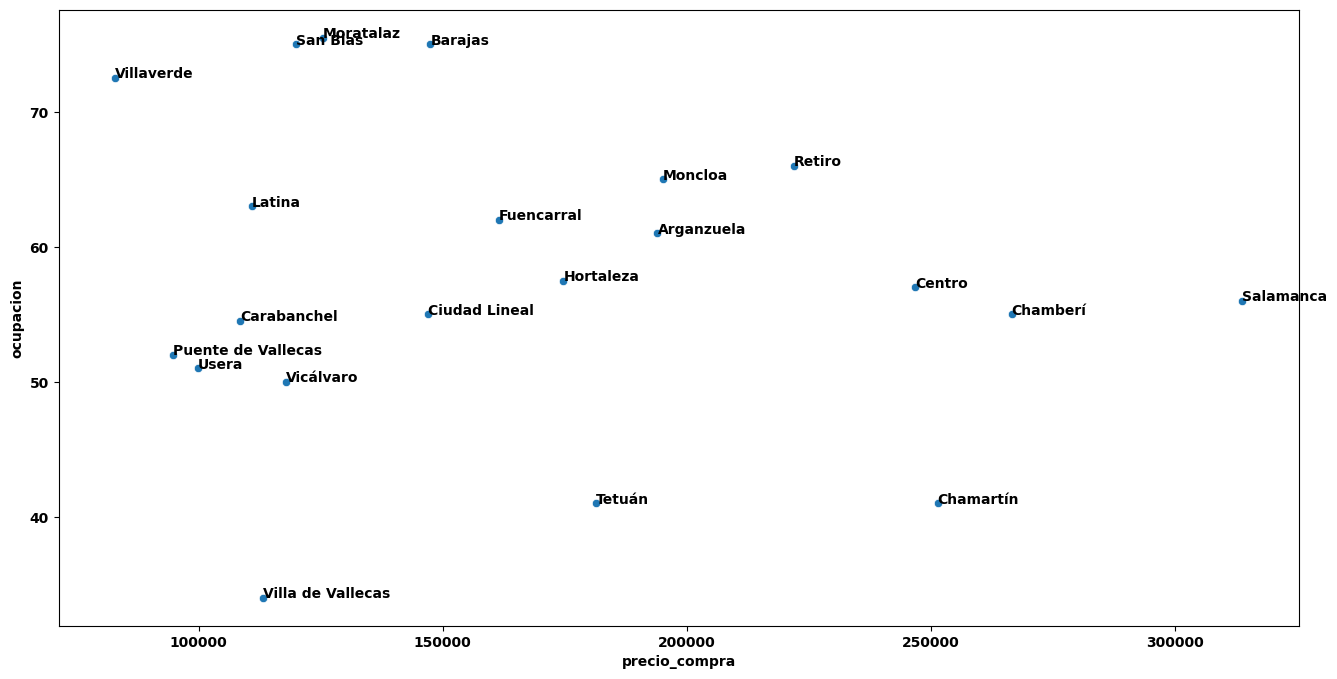

In [32]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

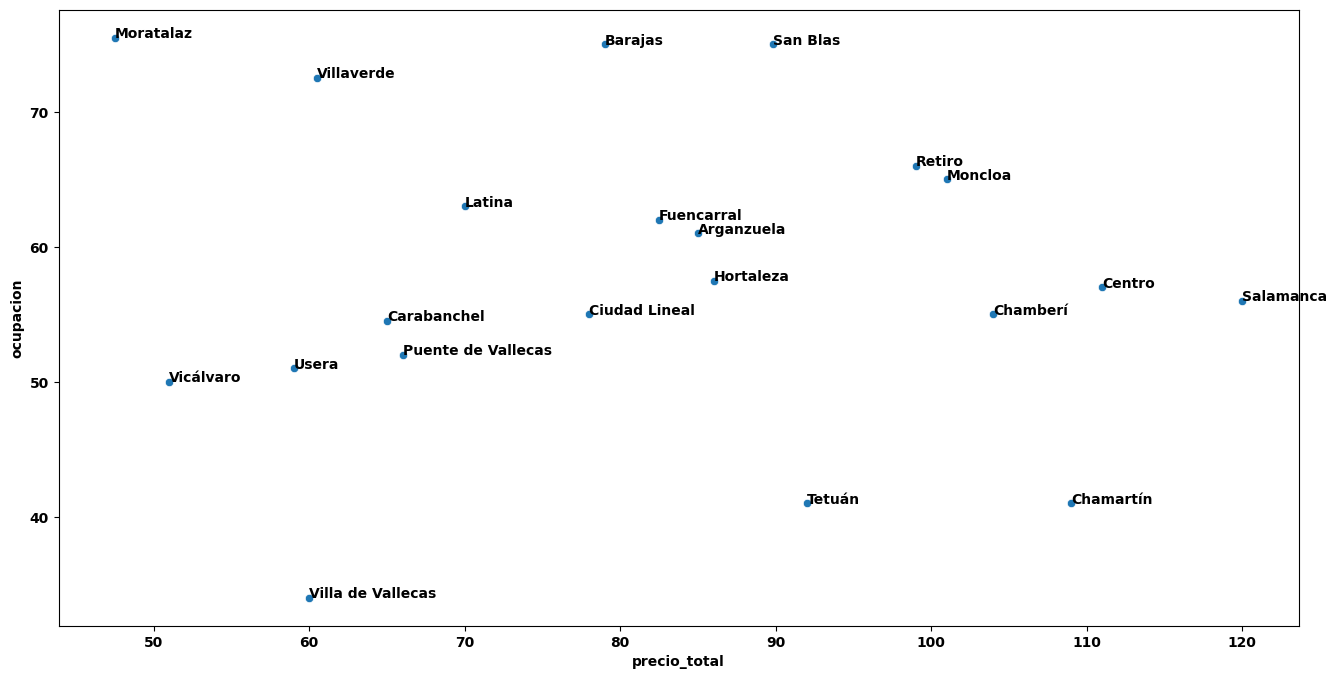

In [33]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_total', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_total.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

Hemos analizado esta relación con dos gráficos diferentes que analizados en conjunto tienen mas sentido porque podemos ver como se relaciona precio_compra y precio_total con la ocupación

No hay una relación directa de la ocupación con el precio_total ni precio_compra, por lo que podríamos encontrar buenas rentabilidades en pisos económicos

A este nivel ya vemos más cosas:

* 1 barrio que sobresale de San Blas
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo <150K: Amposta
    * Medio 150K-250K: Arguelles y Cortés
    * Medio-alto 250K-350K: Almagro
    * Alto >350K: Castellana
    
**Insight 6: Existen ciertos barrios que apriori pueden maximizar la relación ingresos-coste debido a que tienen una ocupación alta con precios medios y su precio de compra no se dispara**

In [34]:
temp = df.groupby('neighbourhood_cleansed')[['ocupacion','precio_total','precio_compra']].median()
temp

,ocupacion,precio_total,precio_compra
neighbourhood_cleansed,,,
Abrantes,45.0,57.00,108480.0
Acacias,64.0,77.62,194000.0
Adelfas,74.0,90.00,221960.0
Aeropuerto,9.0,56.50,147440.0
Aguilas,40.0,50.00,110880.0
...,...,...,...
Valverde,40.0,81.00,161520.0
Ventas,53.0,64.00,147040.0
Vinateros,75.5,32.50,125440.0


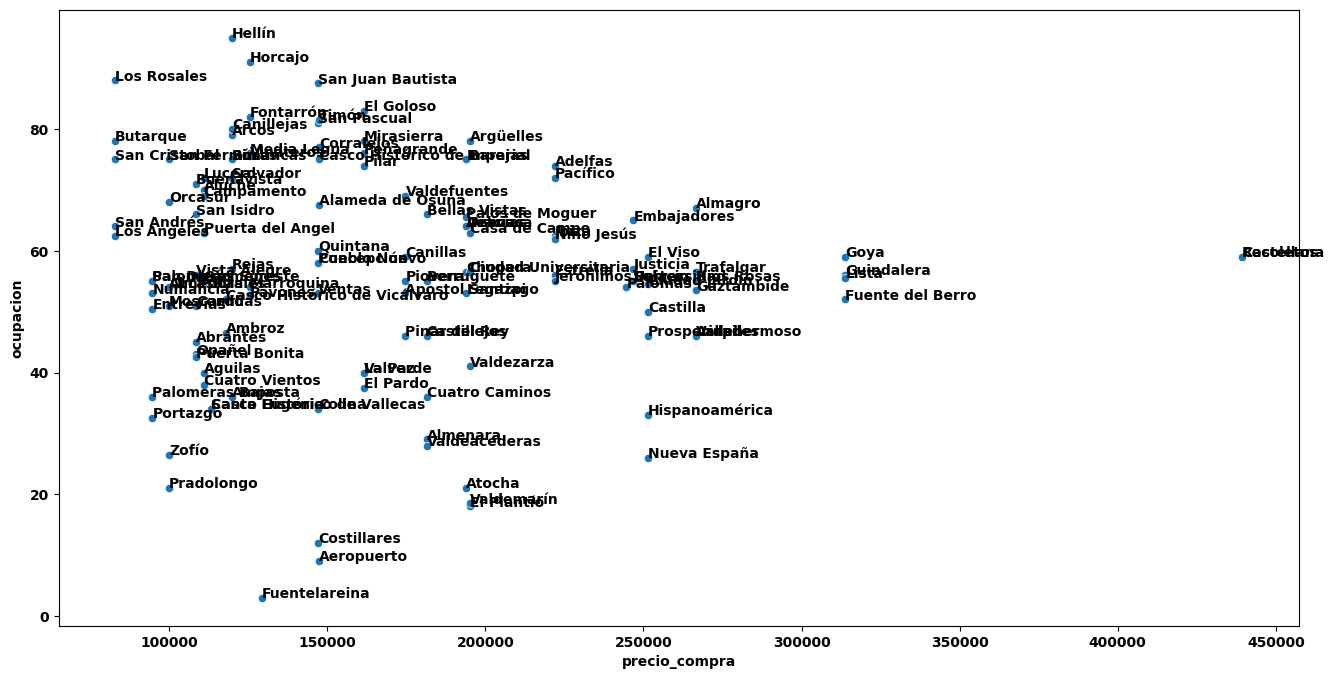

In [35]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

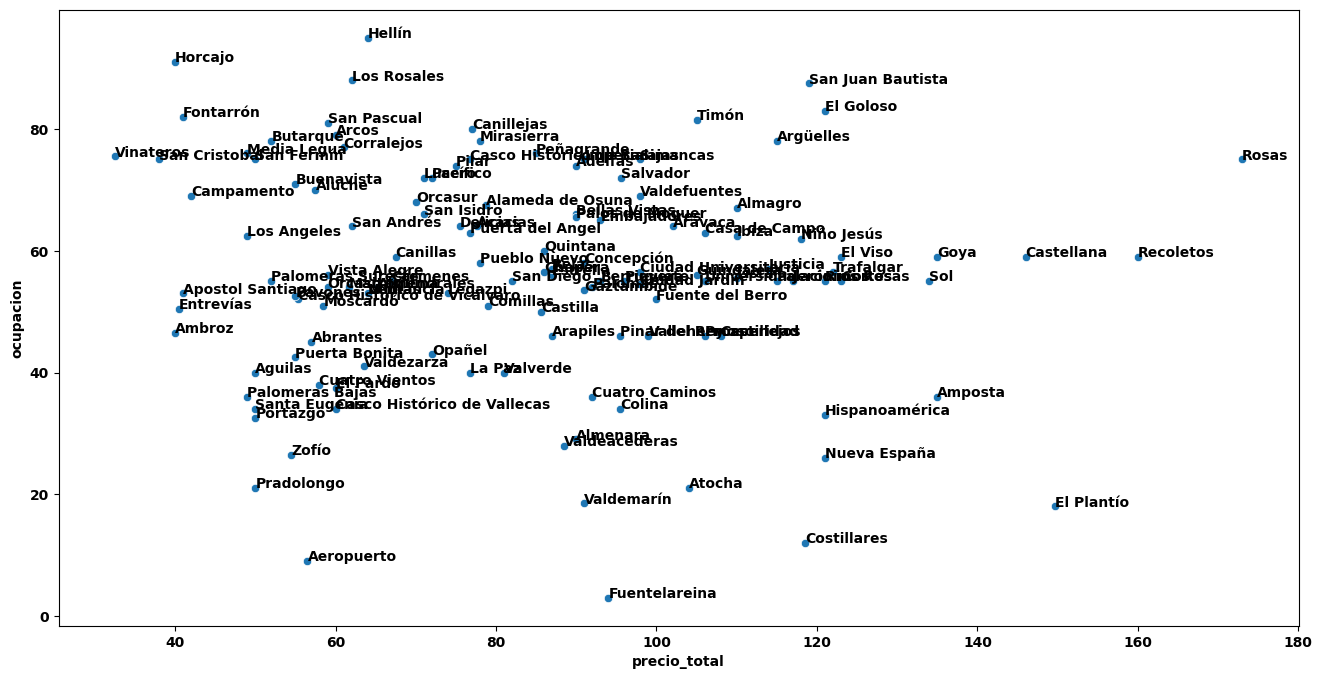

In [36]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_total', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_total.iloc[cada], temp.ocupacion.iloc[cada], temp.index[cada])

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25913 entries, 0 to 25912
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   index                                         25913 non-null  int64         
 1   id                                            25913 non-null  int64         
 2   name                                          25913 non-null  object        
 3   host_response_time                            25913 non-null  object        
 4   host_is_superhost                             25913 non-null  object        
 5   host_verifications                            25913 non-null  object        
 6   host_has_profile_pic                          25913 non-null  object        
 7   host_identity_verified                        25913 non-null  object        
 8   neighbourhood_cleansed                        25913 non-null  obje

In [38]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['ocupacion']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_ocupacion = df[dimensiones + metricas]
minicubo_ocupacion

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,ocupacion
0,01_Una,0-3,1,5-71,60
1,01_Una,0-3,1,71-1136,100
2,01_Una,0-3,1,1-4,100
3,01_Una,0-3,3,5-71,100
4,01_Una,4,3,71-1136,9
...,...,...,...,...,...
25908,01_Una,0-3,1,1-4,0
25909,01_Una,4,3,1-4,4
25910,01_Una,0-3,1,1-4,0
25911,01_Una,0-3,3,1-4,4


In [39]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_ocupacion = minicubo_ocupacion.melt(id_vars=['ocupacion'])
minicubo_ocupacion

,ocupacion,variable,value
0,60,bedrooms_disc,01_Una
1,100,bedrooms_disc,01_Una
2,100,bedrooms_disc,01_Una
3,100,bedrooms_disc,01_Una
4,9,bedrooms_disc,01_Una
...,...,...,...
103647,0,number_of_reviews_disc,1-4
103648,4,number_of_reviews_disc,1-4
103649,0,number_of_reviews_disc,1-4
103650,4,number_of_reviews_disc,1-4


In [40]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_ocupacion = minicubo_ocupacion.groupby(['variable','value'])[['ocupacion']].agg('median')
minicubo_ocupacion

ocupacion
variable               value                     
accommodates_disc      0-3                   63.0
                       4                     51.0
                       4-16                  50.0
bedrooms_disc          00_Estudio           100.0
                       01_Una                50.0
                       02_Dos                54.0
                       03_Tres               53.0
                       04_Cuatro o mas       53.0
beds_disc              1                     64.0
                       3                     54.0
                       3-19                  42.5
number_of_reviews_disc 1-4                   58.0
                       5-71                  54.0
                       71-1136               58.0

Sobre el minicubo vamos analizando cada variable.

In [41]:
minicubo_ocupacion.loc['bedrooms_disc']

,ocupacion
value,
00_Estudio,100.0
01_Una,50.0
02_Dos,54.0
03_Tres,53.0
04_Cuatro o mas,53.0


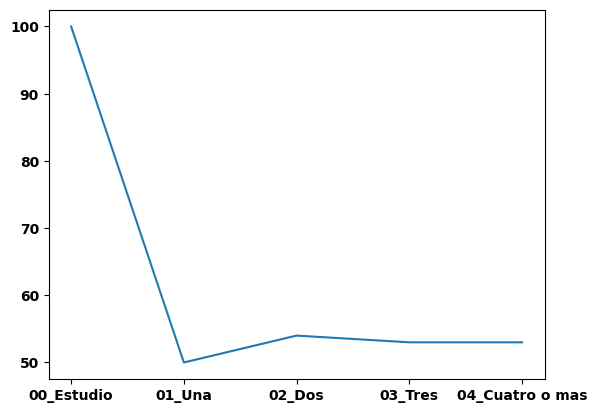

In [42]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['bedrooms_disc'].ocupacion);

En cuanto al número de habitaciones parece que los estudios son los que mayor ocupación tienen por lo que sería mas rentable

In [43]:
minicubo_ocupacion.loc['beds_disc']

,ocupacion
value,
1,64.0
3,54.0
3-19,42.5


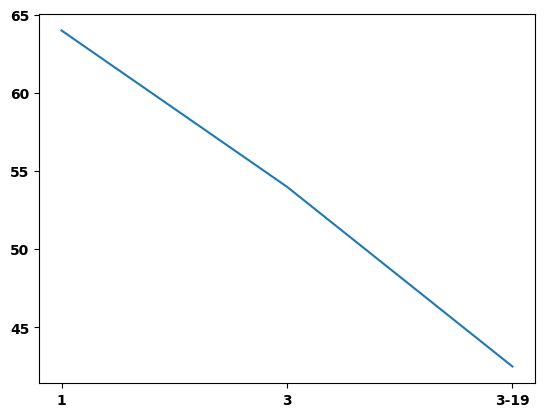

In [44]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['beds_disc'].ocupacion);

En cuanto al número de camas, confirma que hasta 3 camas se ocupa mucho mas

Veámoslo por ejemplo con los pisos de una habitación:

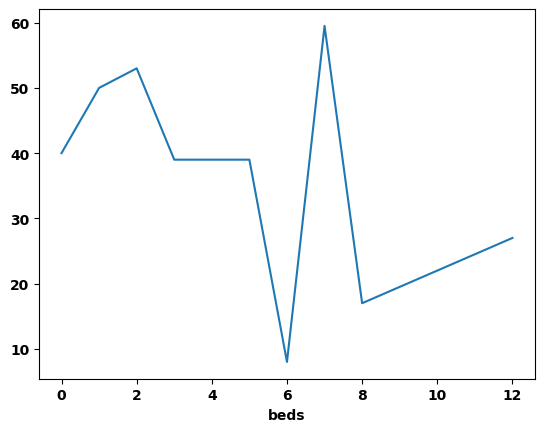

In [45]:
df[df.bedrooms == 1].groupby('beds').ocupacion.median().plot();

Vamos a analizar ahora por el número de huéspedes que aceptan

In [46]:
minicubo_ocupacion.loc['accommodates_disc']

,ocupacion
value,
0-3,63.0
4,51.0
4-16,50.0


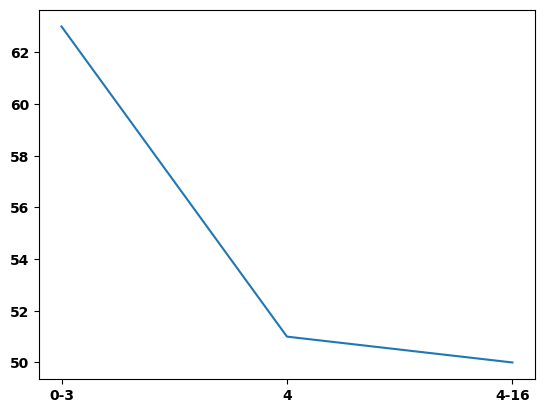

In [47]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['accommodates_disc'].ocupacion);

**Insight 7: el número óptimo de huéspedes es entre 1 y 3**

### Analisis geográfico sobre un mapa

Este mismo análisis por colores se podría hacer por cada una de los zonas o incluso barrios

In [48]:
#conda install -c conda-forge folium
import folium

#Cargamos el mapa de la zona
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

#Hacemos una selección de los datos disponibles para cargarlos en el mapa
datos = df[df.neighbourhood_group == 'San Blas'].copy()

#Definimos la variable por la que segmentaremos por colores y y los quartiles de segmentación
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

#Generamos un bucle que recorra la tabla datos y que vaya extrayendo latitud y longitud y añadiéndolos al mapa
for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

**Insight 8: Existen todavía muchos puntos amarillos y naranjas, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**




* Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos
* Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación ingresos-coste y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir
* Insight 3: el número de camas a evitar es 2
* Insight 4: el número óptimo de huéspedes está en 4, ya el precio de los inmuebles no varia demasiado hasta esos ocupantes pero, a partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante
* Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablemente tengan un precio de compra menor
* Insight 6: Existen ciertos barrios que apriori pueden maximizar la relación ingresos-coste debido a que tienen una ocupación alta con precios medios y su precio de compra no se dispara
* Insight 7: el número óptimo de huéspedes es entre 1 y 3
* Insight 8: Existen todavía muchos puntos amarillos y naranjas, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos